In [1]:
# ipyplubish converter
# !nbpublish -pdf -lb -f latex_ipypublish_nocode assignment1.ipynb
# !nbpublish -pdf -lb -pbug assignment1.ipynb

In [2]:
# nbconverter
# %%capture
# !jupyter nbconvert --to pdf --template hidecode assignment1.ipynb

In [3]:
import numpy as np
import pandas as pd
import heapq as hp
import matplotlib.pyplot as plt
%matplotlib inline

## Classes and Methods
Here are our classes and methods we will be using throughout our project:

In [4]:
# Maze class for gridworld
class Maze:
    
    def __init__(self, rows, columns, seed):
        self.rows = rows
        self.columns = columns
        self.grid, self.spawn, self.target = self.create_grid(seed)
            
    def create_grid(self, seed):
        # Initialize grid that agent travels through
        grid = [[1 for j in range(self.columns)] for i in range(self.rows)]

        # Determine which states are blocked
        np.random.seed(seed)
        grid_blocked = np.random.uniform(size=(self.rows, self.columns))

        # Creation of grid
        for i in range(self.rows):
            for j in range(self.columns):

                # 30% chance a state is blocked
                if grid_blocked[i][j] <= 0.3:
                    grid[i][j] = 0           

        # Marking spawn and target
        spawn = [-1, -1]
        target = [-1, -1]
        while (spawn[0] == target[0] and spawn[1] == target[1]):
            spawn[0] = np.random.randint(0, self.rows)
            spawn[1] = np.random.randint(0, self.columns)
            target[0] = np.random.randint(0, self.rows)
            target[1] = np.random.randint(0, self.columns)
        
        grid[spawn[0]][spawn[1]] = 3
        grid[target[0]][target[1]] = 2

        return grid, spawn, target
    
    def print_grid(self):
        arr_print_np = np.asarray(self.grid)
        plt.figure(figsize=(18,10))
        plt.imshow(arr_print_np, cmap='viridis')

# Linkedlist for closed list
class Linked_list:
    
    def __init__(self):
        self.head = None

# Node class for closed list
class Node:
    
    def __init__(self, data):
        self.data = data
        self.prev = None
        self.next = None
        
def print_maze_path(final_path, maze):
    
    for path in final_path:
        maze.grid[path[0]][path[1]] = 3

    grid_path_np = np.asarray(maze.grid)
    plt.figure(figsize=(16,8))
    plt.imshow(grid_path_np, cmap='viridis')
    
def print_agent_map(final_path, total_states):
    for path in final_path:
        total_states[path[0]][path[1]].agent_map = 3

    grid_path = [[1 for j in range(maze.columns)] for i in range(maze.rows)]
    for i in range(maze.rows):
        for j in range(maze.columns):
            grid_path[i][j] = total_states[i][j].agent_map

    grid_path_np = np.asarray(grid_path)
    plt.figure(figsize=(16,8))
    plt.imshow(grid_path_np, cmap='viridis')

This is our compute_path() method that will be used in all three of our A* algorithms:

In [5]:
# compute_path method

def compute_path():
    path_len = 0
    while state_target.g > open_list[0].f:
        path_len += 1
        
        if path_len == 1:
            closed_list.next = Node(hp.heappop(open_list))
        else:            
            node_insert = Node(hp.heappop(open_list))
            closed_list.next.prev = node_insert
            node_insert.next = closed_list.next
            closed_list.next = node_insert
        
        total_expanded_states_count.append(1)
        
        for child, direction in zip(range(4), [[-1, 0], [1, 0], [0, 1], [0, -1]]): 
            row = closed_list.next.data.coord[0] + direction[0]
            column = closed_list.next.data.coord[1] + direction[1]

            if row < 0 or row >= maze.rows or column < 0 or column >= maze.columns: #ERROR COULD BE FROM HERE
                continue
            elif total_states[row][column].agent_map == 0:###
                continue                                ###
            else:                                       ###
                state_succ = total_states[row][column]  ### don't remove, just shift-tab
 
            if state_succ.search < counter:
                state_succ.init_g(float('inf'))
                state_succ.search = counter
                
            if path_len == 1:
                if maze.grid[row][column] == 0:
                    total_states[row][column].agent_map = 0
                    continue

            if state_succ.g > closed_list.next.data.g + 1:
                state_succ.g = closed_list.next.data.g + 1
                state_succ.pointer = closed_list.next.data #ERROR COULD BE HERE

                for state, i in zip(open_list, range(len(open_list))):
                    if state_succ.coord == state.coord:
                        open_list[i] = open_list[0] #ERROR COULD BE HERE
                        hp.heappop(open_list)
                        hp.heapify(open_list)

                state_succ.init_f()
                hp.heappush(open_list, state_succ)
                hp.heapify(open_list)
        if len(open_list) == 0:
            break

## Forward A*

Keep in mind that we have a different state class for our different A* algorithms:

In [6]:
# States class for all possible states
class State:
    
    def __init__(self, row, column, target):
        self.coord = [row, column]
        self.g = None
        self.h = abs(row-target[0]) + abs(column-target[1])
        self.f = None
        self.pointer = None
        self.search = 0
        self.agent_map = 1
    
    def init_g(self, g_new):
        self.g = g_new
    
    def init_f(self):
        self.f = self.g + self.h
    
    # For binary heap open list to compare states
    def __lt__(self, other):
        if self.f == other.f:
            if self.g == other.g:
                np.random.uniform() > .5
            else:
                return self.g > other.g # Maze(10, 10, 4) shows the difference between tiebreaking based on g
                                    # Currently set to choosing g that is larger
        else:
            return self.f < other.f

Our Repeated Forward A* main method():

In [10]:
# HOW TO USE:
# Maze(101, 101, i) corresponds to Maze(#rows, #columns, maze#)
# Maze 22, 40, and 49 are the only mazes which our agent couldn't find the end.

# To test multiple iterations of the maze
reach_target = []
expanded_states = []
for i in range(10):
    #print("\nMaze#", i)
    
    maze = Maze(101, 101, i)
    success = True
    counter = 0
    total_expanded_states_count = []
    total_states = [[State(i, j, maze.target) for j in range(maze.columns)] for i in range(maze.rows)]
    state_spawn = total_states[maze.spawn[0]][maze.spawn[1]]
    state_spawn.agent_map = 3
    state_target = total_states[maze.target[0]][maze.target[1]]
    state_target.agent_map = 2

    # for printing
    final_path = []
    final_path.append(state_spawn.coord)

    while state_spawn.coord != state_target.coord:
        final_path.append(state_spawn.coord)
        counter += 1
        state_spawn.init_g(0)
        state_spawn.init_f()
        state_spawn.search = counter
        state_target.init_g(float('inf'))
        state_target.search = counter
        open_list = []
        closed_list = Linked_list()
        hp.heappush(open_list, state_spawn)

        compute_path()

        if len(open_list) == 0:
            success = False
            break    

        state_curr = open_list[0]
        path = []
        path.append(state_curr.coord)
        while state_curr.coord != state_spawn.coord:
            state_curr = state_curr.pointer
            path.append(state_curr.coord)
        coord = path[-2]
        state_spawn = total_states[coord[0]][coord[1]]

    if success == True:
        reach_target.append("Yes")
        #print("Your agent reached the target!")
    else:
        reach_target.append("No")
        #print("Your agent couldn't reach the target...")
    
    expanded_states.append(len(total_expanded_states_count))

d = {'reach_target':reach_target,'expanded_states':expanded_states}
df = pd.DataFrame(d)
    #print('Total expanded states:', len(total_expanded_states_count))
    
    # Print final path
    # print('\nFinal path:', final_path)    

#     Visualization of final path
#     print('\nPath travelled:')
#     print_maze_path(final_path, maze)

## Backward A*

In [12]:
class State:
    
    def __init__(self, row, column, maze):
        self.coord = [row, column]
        self.maze = maze
        self.target = maze.target
        self.g = None
        self.f = None
        self.pointer = None
        self.search = 0
        self.agent_map = 1
    
    @property
    def h(self):
        return (abs(self.coord[0]-self.maze.target[0])
                + abs(self.coord[1]-self.maze.target[1]))
        
    def init_g(self, g_new):
        self.g = g_new
    
    def init_f(self):
        self.f = self.g + self.h
    
    # For binary heap open list to compare states
    def __lt__(self, other):
        if self.f == other.f:
            if self.g == other.g:
                np.random.uniform() > .5
            else:
                return self.g > other.g # Maze(10, 10, 4) shows the difference between tiebreaking based on g
                                    # Currently set to choosing g that is larger
        else:
            return self.f < other.f

In [13]:
# compute_path method

def compute_path():
    path_len = 0
    while state_target.g > open_list[0].f:
        path_len += 1
#         if counter > p:
#             print('A* algorithm path:', open_list[0].coord, open_list[0].g, open_list[0].h, open_list[0].f)
#        print("current target", state_target.coord)
        if path_len == 1:
            closed_list.next = Node(hp.heappop(open_list))
            
            for child, direction in zip(range(4), [[-1, 0], [1, 0], [0, 1], [0, -1]]): 
                row = state_target.coord[0] + direction[0]
                column = state_target.coord[1] + direction[1]
                #print('possible coords', row, column)
                if row < 0 or row >= maze.rows or column < 0 or column >= maze.columns: #ERROR COULD BE FROM HERE
                    continue
                elif maze.grid[row][column] == 0:
                    total_states[row][column].agent_map = 0
        else:            
            node_insert = Node(hp.heappop(open_list))
            closed_list.next.prev = node_insert
            node_insert.next = closed_list.next
            closed_list.next = node_insert
        
        total_expanded_states_count.append(1)
        
        for child, direction in zip(range(4), [[-1, 0], [1, 0], [0, 1], [0, -1]]): 
            row = closed_list.next.data.coord[0] + direction[0]
            column = closed_list.next.data.coord[1] + direction[1]
            
            if row < 0 or row >= maze.rows or column < 0 or column >= maze.columns: #ERROR COULD BE FROM HERE
                continue
            elif total_states[row][column].agent_map == 0:###
                continue                                ###
            else:                                       ###
                state_succ = total_states[row][column]  ### don't remove, just shift-tab
 
            if state_succ.search < counter:
                state_succ.init_g(float('inf'))
                state_succ.search = counter
                
#             if path_len == 1:
#                 if maze.grid[row][column] == 0:
#                     total_states[row][column].agent_map = 0
#                     continue

            if state_succ.g > closed_list.next.data.g + 1:
                state_succ.g = closed_list.next.data.g + 1
                state_succ.pointer = closed_list.next.data #ERROR COULD BE HERE

                for state, i in zip(open_list, range(len(open_list))):
                    if state_succ.coord == state.coord:
                        open_list[i] = open_list[0] #ERROR COULD BE HERE
                        hp.heappop(open_list)
                        hp.heapify(open_list)

                state_succ.init_f()
                hp.heappush(open_list, state_succ)
                hp.heapify(open_list)
                
#         if state_target.g <= open_list[0].f:
#             print(1)
#             #print('open_list', open_list[0])
#             for child, direction in zip(range(4), [[-1, 0], [1, 0], [0, 1], [0, -1]]): 
#                 row = open_list[0].coord[0] + direction[0]
#                 column = open_list[0].coord[1] + direction[1]
#                 #print('possible coords', row, column)
#                 if maze.grid[row][column] == 0:
#                     total_states[row][column].agent_map = 0
#                     continue
        if len(open_list) == 0:
            break

In [14]:
# HOW TO USE:
# Maze(101, 101, i) corresponds to Maze(#rows, #columns, maze#)
# Maze 22, 40, and 49 are the only mazes which our agent couldn't find the end.

reach_target = []
expanded_states = []
    
# To test multiple iterations of the maze
for i in range(10):
    #print("\nMaze#", i)

    maze = Maze(101, 101, i)
    temp_coord = maze.target
    maze.target = maze.spawn
    maze.spawn = temp_coord
    success = True
    counter = 0
    total_expanded_states_count = []
    total_states = [[State(i, j, maze) for j in range(maze.columns)] for i in range(maze.rows)]
    state_spawn = total_states[maze.spawn[0]][maze.spawn[1]]
    state_spawn.agent_map = 2
    state_target = total_states[maze.target[0]][maze.target[1]]
    state_target.agent_map = 3

    # for printing
    final_path = []
    final_path.append(state_spawn.coord)

    while state_spawn.coord != state_target.coord:
        final_path.append(state_spawn.coord)
        counter += 1
        state_spawn.init_g(0)
        state_spawn.init_f()
        state_spawn.search = counter
        state_target.init_g(float('inf'))
        state_target.search = counter
        open_list = []
        closed_list = Linked_list()
        hp.heappush(open_list, state_spawn)
       # print(counter)
        p = 0
        compute_path()

        if len(open_list) == 0:
            success = False
            break   

        state_curr = open_list[0]
        path = []
        path.append(state_curr.coord)

        while state_curr.coord != state_spawn.coord:
            state_curr = state_curr.pointer
            path.append(state_curr.coord)

        coord = path[1]

    #     if counter > p:
    #         print("counter:", counter)
    #         agent_map = [[1 for j in range(maze.columns)] for i in range(maze.rows)]
    #         for i in range(maze.rows):
    #             for j in range(maze.columns):
    #                     agent_map[i][j] = total_states[i][j].agent_map
    #         grid_path_np = np.asarray(agent_map)
    #         plt.figure(figsize=(10,4))
    #         plt.imshow(grid_path_np, cmap='viridis')

        total_states[state_target.coord[0]][state_target.coord[1]].agent_map = 1
        state_target = total_states[coord[0]][coord[1]]
        maze.target = coord
        total_states[coord[0]][coord[1]].agent_map = 3

    if success == True:
        reach_target.append("Yes")
        #print("Your agent reached the target!")
    else:
        reach_target.append("No")
        #print("Your agent couldn't reach the target...")
    
    expanded_states.append(len(total_expanded_states_count))

d2 = {'reach_target':reach_target,'expanded_states':expanded_states}
df2 = pd.DataFrame(d2)

    #print('Total expanded states:', len(total_expanded_states_count))
    
    # Print final path
    # print('\nFinal path:', final_path)    

    # Visualization of final path
    # print('\nPath travelled:')
    # print_agent_map(final_path, maze)

# Part 3

In [56]:
df.rename(columns={'expanded_states': 'forward_runtime'}, inplace=True)
df2.rename(columns={'expanded_states': 'backward_runtime'}, inplace=True)
df3 = pd.concat([df, df2], axis=1, sort=False)
df3 = (df3.assign(forward_astar_faster = lambda df3: df3.iloc[:,1] < df3.iloc[:,3])
    .assign(times_slower = lambda df3: (df3.iloc[:,3] - df3.iloc[:,1]) / df3.iloc[:,1])
    .iloc[:, [1, 3, 5]])
df3

,forward_runtime,backward_runtime,times_slower
0,3643,9065,1.488334
1,482,485,0.006224
2,1969,2996,0.521585
3,3181,7685,1.415907
4,1479,4970,2.360379
5,23433,73351,2.130244
6,14009,53717,2.834464
7,1760,2593,0.473295
8,15718,80371,4.113310
9,14808,63816,3.309562


In [58]:
df3.iloc[:, 2].sum()/10

1.8653302666838627

## Adaptive A*

In [235]:
# compute_path method

def compute_path():
    path_len = 0
    while state_target.g > open_list[0].f:
        path_len += 1
        
        if path_len == 1:
            closed_list.next = Node(hp.heappop(open_list))
        else:            
            node_insert = Node(hp.heappop(open_list))
            closed_list.next.prev = node_insert
            node_insert.next = closed_list.next
            closed_list.next = node_insert
        
        total_expanded_states_count.append(1)
        
        for child, direction in zip(range(4), [[-1, 0], [1, 0], [0, 1], [0, -1]]): 
            row = closed_list.next.data.coord[0] + direction[0]
            column = closed_list.next.data.coord[1] + direction[1]

            if row < 0 or row >= maze.rows or column < 0 or column >= maze.columns: #ERROR COULD BE FROM HERE
                continue
            elif total_states[row][column].agent_map == 0:###
                continue                                ###
            else:                                       ###
                state_succ = total_states[row][column]  ### don't remove, just shift-tab
 
            if state_succ.search < counter:
                state_succ.init_g(float('inf'))
                state_succ.search = counter
                
            if path_len == 1:
                if maze.grid[row][column] == 0:
                    total_states[row][column].agent_map = 0
                    continue

            if state_succ.g > closed_list.next.data.g + 1:
                state_succ.g = closed_list.next.data.g + 1
                state_succ.pointer = closed_list.next.data #ERROR COULD BE HERE

                for state, i in zip(open_list, range(len(open_list))):
                    if state_succ.coord == state.coord:
                        open_list[i] = open_list[0] #ERROR COULD BE HERE
                        hp.heappop(open_list)
                        hp.heapify(open_list)

                state_succ.init_f()
                hp.heappush(open_list, state_succ)
                hp.heapify(open_list)
        if len(open_list) == 0:
            break

In [236]:
# States class for all possible states
class State:
    
    def __init__(self, row, column, target):
        self.coord = [row, column]
        self.g = None
        self.h = abs(row-target[0]) + abs(column-target[1])
        self.f = None
        self.pointer = None
        self.search = 0
        self.agent_map = 1
    
    def init_g(self, g_new):
        self.g = g_new
    
    def init_f(self):
        self.f = self.g + self.h
    
    # For binary heap open list to compare states
    def __lt__(self, other):
        if self.f == other.f:
            if self.g == other.g:
                np.random.uniform() > .5
            else:
                return self.g > other.g # Maze(10, 10, 4) shows the difference between tiebreaking based on g
                                    # Currently set to choosing g that is larger
        else:
            return self.f < other.f


Maze# 0
Your agent reached the target!
Total expanded states: 4330

Path travelled:

Maze# 1
Your agent reached the target!
Total expanded states: 11812

Path travelled:

Maze# 2
Your agent reached the target!
Total expanded states: 11364

Path travelled:

Maze# 3
Your agent reached the target!
Total expanded states: 4617

Path travelled:

Maze# 4
Your agent reached the target!
Total expanded states: 2404

Path travelled:

Maze# 5
Your agent reached the target!
Total expanded states: 5003

Path travelled:

Maze# 6
Your agent reached the target!
Total expanded states: 1039

Path travelled:

Maze# 7
Your agent reached the target!
Total expanded states: 11097

Path travelled:

Maze# 8
Your agent reached the target!
Total expanded states: 4684

Path travelled:

Maze# 9
Your agent reached the target!
Total expanded states: 7189

Path travelled:


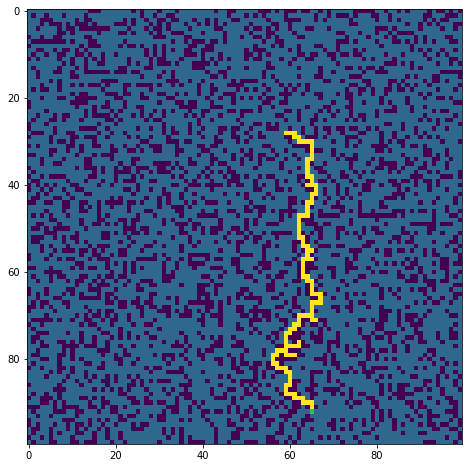

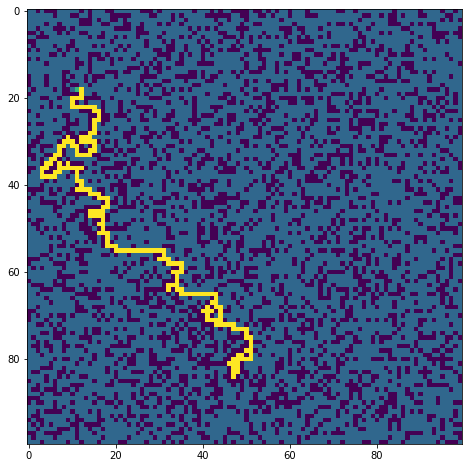

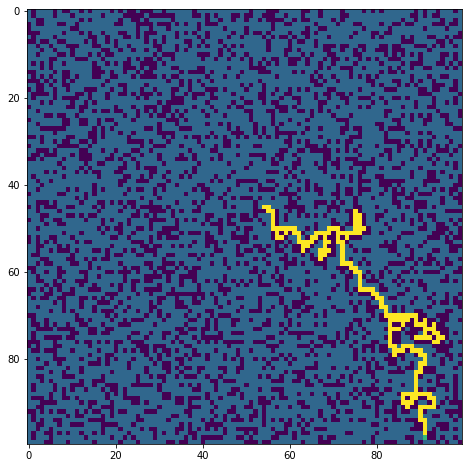

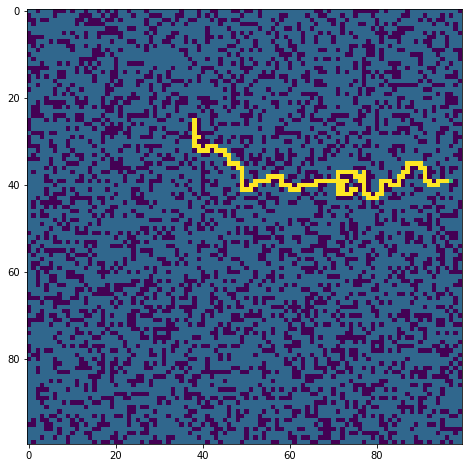

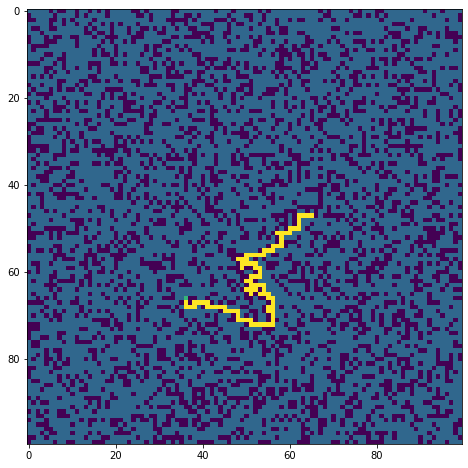

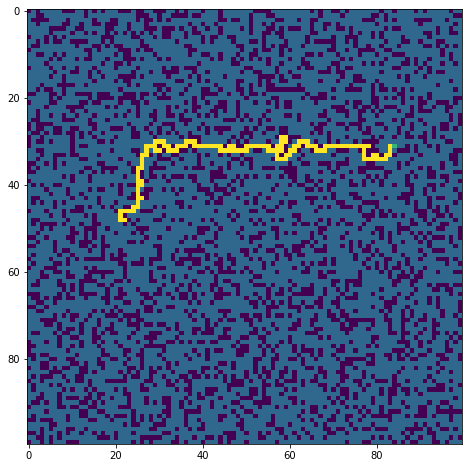

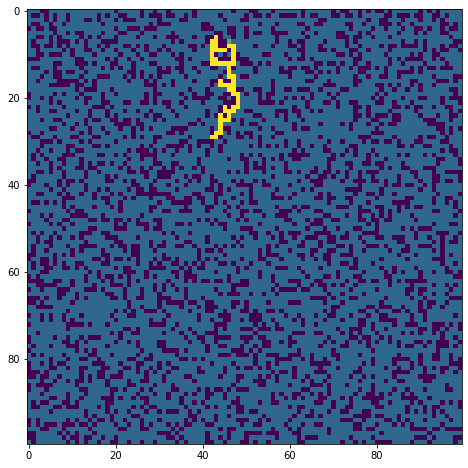

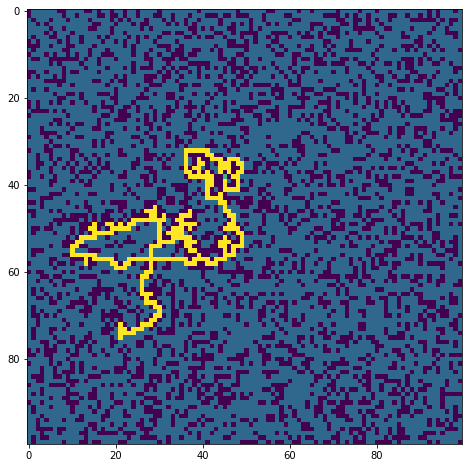

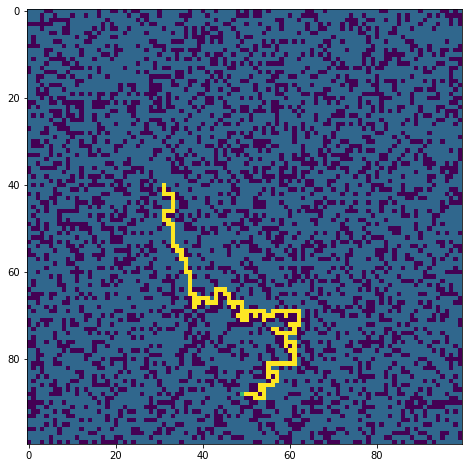

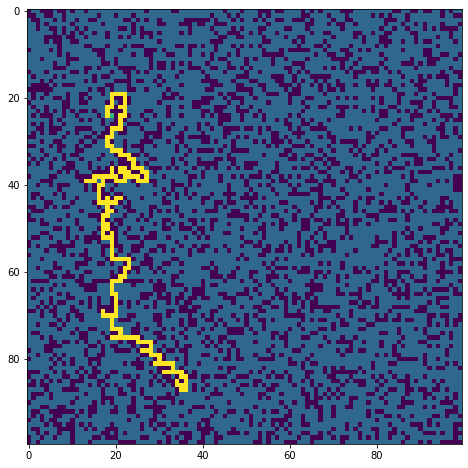

In [237]:
# To test multiple iterations of the maze
for i in range(10):
    print("\nMaze#", i)

    maze = Maze(100, 100, i)
    success = True
    counter = 0
    total_expanded_states_count = []
    curr_expanded_states_count = 0
    total_states = [[State(i, j, maze.target) for j in range(maze.columns)] for i in range(maze.rows)]
    state_spawn = total_states[maze.spawn[0]][maze.spawn[1]]
    state_spawn.agent_map = 3
    state_target = total_states[maze.target[0]][maze.target[1]]
    state_target.agent_map = 2

    # for printing
    final_path = []
    final_path.append(state_spawn.coord)

    while state_spawn.coord != state_target.coord:
        final_path.append(state_spawn.coord)
        counter += 1
        state_spawn.init_g(0)
        state_spawn.init_f()
        state_spawn.search = counter
        state_target.init_g(float('inf'))
        state_target.search = counter
        open_list = []
        closed_list = Linked_list()
        hp.heappush(open_list, state_spawn)

        compute_path()

        if len(open_list) == 0:
            success = False
            break    

        # Finding the path for this A* iteration
        state_curr = open_list[0]
        path = []
        path.append(state_curr)
        while state_curr.coord != state_spawn.coord:
            state_curr = state_curr.pointer
            path.append(state_curr)

           # print(state_curr.g, state_curr.h)
        coord = path[-2].coord
        state_spawn = total_states[coord[0]][coord[1]]

        current_node = closed_list.next
        state_goal_g = open_list[0].g
        curr_expanded_states_count = (len(total_expanded_states_count)
                                         - curr_expanded_states_count)
        for i in range(curr_expanded_states_count):
            current_node.data.h = state_goal_g - current_node.data.g
            current_node = current_node.next
        curr_expanded_states_count = len(total_expanded_states_count)

    # Limit A* iteration
    #     if counter == 1:
    #         break

    if success == True:
        print("Your agent reached the target!")
    else:
        print("Your agent couldn't reach the target...")

    print('Total expanded states:', len(total_expanded_states_count))
    # Print final path
    # print('\nFinal path:', final_path)    

    # Visualization of final path
    print('\nPath travelled:')
    print_maze_path(final_path, maze)

In [243]:
# # Test code

# test_maze = Maze(5, 5, 1)
# test_maze.grid = [[1 for j in range(test_maze.columns)] for i in range(test_maze.rows)]
# test_maze.grid[1][2] = 0
# test_maze.grid[2][2] = 0
# test_maze.grid[3][2] = 0
# test_maze.grid[2][3] = 0
# test_maze.grid[3][3] = 0
# test_maze.grid[4][3] = 0
# test_maze.grid[4][2] = 3
# test_maze.grid[4][4] = 2
# test_maze.spawn = [4, 2]
# test_maze.target = [4, 4]

# # # Repeated Forward A*

# # # HOW TO USE:
# # # Maze(101, 101, i) corresponds to Maze(#rows, #columns, maze#)
# # # Maze 22, 40, and 49 are the only mazes which our agent couldn't find the end.

# # # To test multiple iterations of the maze
# # # for i in range(10):
# # #     print("\nMaze#", i)
    
# maze = test_maze
# #maze = Maze(100, 100, i)
# temp_coord = maze.target
# maze.target = maze.spawn
# maze.spawn = temp_coord
# success = True
# counter = 0
# total_expanded_states_count = []
# total_states = [[State(i, j, maze) for j in range(maze.columns)] for i in range(maze.rows)]
# state_spawn = total_states[maze.spawn[0]][maze.spawn[1]]
# state_spawn.agent_map = 2
# state_target = total_states[maze.target[0]][maze.target[1]]
# state_target.agent_map = 3

# # for printing
# final_path = []
# final_path.append(state_spawn.coord)

# while state_spawn.coord != state_target.coord:
#     final_path.append(state_spawn.coord)
#     counter += 1
#     state_spawn.init_g(0)
#     state_spawn.init_f()
#     state_spawn.search = counter
#     state_target.init_g(float('inf'))
#     state_target.search = counter
#     open_list = []
#     closed_list = Linked_list()
#     hp.heappush(open_list, state_spawn)
#    # print(counter)
#     p = 0
#     compute_path()

#     if len(open_list) == 0:
#         success = False
#         break   

#     state_curr = open_list[0]
#     path = []
#     path.append(state_curr.coord)

#     while state_curr.coord != state_spawn.coord:
#         state_curr = state_curr.pointer
#         path.append(state_curr.coord)

#     coord = path[1]

# #     if counter > p:
# #         print("counter:", counter)
# #         agent_map = [[1 for j in range(maze.columns)] for i in range(maze.rows)]
# #         for i in range(maze.rows):
# #             for j in range(maze.columns):
# #                     agent_map[i][j] = total_states[i][j].agent_map
# #         grid_path_np = np.asarray(agent_map)
# #         plt.figure(figsize=(10,4))
# #         plt.imshow(grid_path_np, cmap='viridis')

#     total_states[state_target.coord[0]][state_target.coord[1]].agent_map = 1
#     state_target = total_states[coord[0]][coord[1]]
#     maze.target = coord
#     total_states[coord[0]][coord[1]].agent_map = 3

#     print(counter, len(total_expanded_states_count))
# if success == True:
#     print("Your agent reached the target!")
# else:
#     print("Your agent couldn't reach the target...")

# print('Total expanded states:', len(total_expanded_states_count))
# # Print final path
# # print('\nFinal path:', final_path)    

# # Visualization of final path
# # print('\nPath travelled:')
# # print_agent_map(final_path, maze)

1 9
2 16
3 22
4 30
5 40
6 47
7 53
8 58
9 63
10 66
11 68
12 69
Your agent reached the target!
Total expanded states: 69
